Find out those columns which contain missing values – they might also contain some data entry errors. If you are able to detect any data entry error in any column with missing values, then convert these erroneous values to missing values forcibly (so that we can deal with them in the next step through MVA). Now do MVA to seal with all missing values by using concepts taught in the class (and their relevant charts of missingno module) o Interpret each chart in 1-2 sentences o Define and justify your MVA strategy for each column

In [17]:
import pandas as pd
ns=pd.read_csv('nyc-rolling-sales-dirty.csv')

In [26]:
ns.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [27]:
ns.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84518 non-null  object 
 2   BUILDING CLASS CATEGORY         84497 non-null  object 
 3   TAX CLASS AT PRESENT            84541 non-null  object 
 4   BLOCK                           84532 non-null  float64
 5   LOT                             84538 non-null  float64
 6   EASE-MENT                       84548 non-null  object 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84503 non-null  object 
 9   APARTMENT NUMBER                84547 non-null  object 
 10  ZIP CODE                        84512 non-null  float64
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

### Object categories need to be checked

In [29]:
ns.select_dtypes(exclude=['float','int64']).info() #extracting only object categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   NEIGHBORHOOD                    84518 non-null  object
 1   BUILDING CLASS CATEGORY         84497 non-null  object
 2   TAX CLASS AT PRESENT            84541 non-null  object
 3   EASE-MENT                       84548 non-null  object
 4   BUILDING CLASS AT PRESENT       84548 non-null  object
 5   ADDRESS                         84503 non-null  object
 6   APARTMENT NUMBER                84547 non-null  object
 7   LAND SQUARE FEET                84548 non-null  object
 8   GROSS SQUARE FEET               84548 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 10  SALE PRICE                      84548 non-null  object
 11  SALE DATE                       84548 non-null  object
dtypes: object(12)
memory usage: 7.7+ MB


In [30]:
df_obj = ns.select_dtypes(['object'])


ns[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

#### Checking neighbourhood column

In [31]:
pd.set_option('display.max_rows', 300)
ns['NEIGHBORHOOD'].value_counts()


FLUSHING-NORTH               3068
UPPER EAST SIDE (59-79)      1736
UPPER EAST SIDE (79-96)      1590
UPPER WEST SIDE (59-79)      1439
BEDFORD STUYVESANT           1436
MIDTOWN EAST                 1418
BOROUGH PARK                 1245
ASTORIA                      1216
BAYSIDE                      1150
FOREST HILLS                 1069
SHEEPSHEAD BAY               1013
UPPER WEST SIDE (79-96)      1004
JACKSON HEIGHTS               992
EAST NEW YORK                 982
FLUSHING-SOUTH                918
MIDTOWN WEST                  918
HARLEM-CENTRAL                847
FLATBUSH-EAST                 846
BAY RIDGE                     832
CHELSEA                       803
ELMHURST                      802
CROWN HEIGHTS                 793
CANARSIE                      783
GREAT KILLS                   776
BUSHWICK                      769
RICHMOND HILL                 749
REGO PARK                     721
PARK SLOPE                    706
GRAVESEND                     705
TRIBECA       

In [32]:
ns.loc[(ns['NEIGHBORHOOD'] == " ") | (ns['NEIGHBORHOOD'] == '-')].shape #no data issues can be found

(0, 21)

In [33]:
ns['NEIGHBORHOOD'] = ns['NEIGHBORHOOD'].astype(str)


#### Checking building column - no issues were found

In [34]:
ns['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                       18235
02 TWO FAMILY DWELLINGS                       15828
13 CONDOS - ELEVATOR APARTMENTS               12989
10 COOPS - ELEVATOR APARTMENTS                12902
03 THREE FAMILY DWELLINGS                      4348
07 RENTALS - WALKUP APARTMENTS                 3466
09 COOPS - WALKUP APARTMENTS                   2767
04 TAX CLASS 1 CONDOS                          1656
44 CONDO PARKING                               1426
15 CONDOS - 2-10 UNIT RESIDENTIAL              1281
05 TAX CLASS 1 VACANT LAND                     1248
17 CONDO COOPS                                 1201
22 STORE BUILDINGS                              935
12 CONDOS - WALKUP APARTMENTS                   926
14 RENTALS - 4-10 UNIT                          671
29 COMMERCIAL GARAGES                           587
43 CONDO OFFICE BUILDINGS                       475
31 COMMERCIAL VACANT LAND                       463
08 RENTALS - ELEVATOR APARTMENTS                382
47 CONDO NON

#### Checking tax class present column 

In [35]:
ns['TAX CLASS AT PRESENT'].value_counts() ## Problem highlighted blank space 

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [36]:
ns['TAX CLASS AT PRESENT'].isnull().sum()

7

In [37]:
import numpy as np
ns.loc[(ns['TAX CLASS AT PRESENT'] == "") , 'TAX CLASS AT PRESENT']=np.nan
ns['TAX CLASS AT PRESENT'].value_counts() # problem solved by changing it with np.nan
ns['TAX CLASS AT PRESENT'].isnull().sum()

745

#### Checking the lot column

In [38]:
ns['LOT'].value_counts()

1.0       4125
20.0       983
12.0       972
40.0       935
23.0       911
          ... 
1783.0       1
3648.0       1
5091.0       1
1816.0       1
2382.0       1
Name: LOT, Length: 2627, dtype: int64

In [39]:
ns['LOT'].isnull().sum()

10

In [41]:
df=ns.loc[pd.to_numeric(ns['LOT'],errors='coerce').notna()==False].copy()
df.shape
df['LOT'].value_counts()

Series([], Name: LOT, dtype: int64)

In [42]:
pd.set_option('display.max_rows', 200)
b=df['LOT'].value_counts() # this can be done from regular expresion as well
m=pd.DataFrame(b).index.tolist()

for i in m:
    print(m)
    ns.loc[(ns['LOT'] == i) , 'LOT'] = np.nan

In [43]:
ns['LOT'].isnull().sum() # correction validated

10

In [24]:
ns["LOT"] = ns["LOT"].apply(pd.to_numeric)

#### Checking Easement Column

In [44]:
ns['EASE-MENT'].value_counts()

    84548
Name: EASE-MENT, dtype: int64

In [45]:
ns['EASE-MENT'].isnull().sum()

0

In [46]:
ns.loc[(ns['EASE-MENT'] == " "), 'EASE-MENT']=np.nan

In [47]:
ns['EASE-MENT'].isnull().sum()  #we can drop this column

0

In [48]:
ns.drop('EASE-MENT',axis=1,inplace=True)

#### Checking Building class at present

In [49]:
ns['BUILDING CLASS AT PRESENT'].value_counts() #regex is len two string

D4       12663
R4       12482
A1        6753
A5        5683
B2        4923
B1        4749
C0        4379
B3        3824
A2        2821
C6        2760
B9        1543
R3        1444
A9        1401
R1        1228
V0        1222
R9        1201
C3        1097
RG        1049
R2         926
C1         847
C2         815
S2         798
           738
RB         471
A0         469
V1         455
A3         389
K1         361
S1         353
RS         350
C7         341
K4         332
RP         292
G7         256
D0         236
A4         235
S9         227
E1         221
RH         211
R6         185
S3         182
C4         180
K2         174
D1         172
G0         170
C5         167
RK         156
Z9         150
S4         142
S5         121
G2         105
G1         101
R8         100
A6          93
H3          85
F5          84
O2          83
O5          81
E9          75
O7          67
D7          66
M1          62
D3          57
F4          55
RT          47
O6          41
RR        

In [50]:
ns['BUILDING CLASS AT PRESENT'].isnull().sum()

0

In [51]:
pd.set_option('display.max_rows', 200)
b=ns['BUILDING CLASS AT PRESENT'].value_counts() # this can be done from regular expresion as well
m=pd.DataFrame(b).index.tolist()
[x for x in m if  len(x) != 2]

['', '65000']

In [54]:
ns.loc[(ns['BUILDING CLASS AT PRESENT'] == "") | (ns['BUILDING CLASS AT PRESENT'] == '65000'), 'BUILDING CLASS AT PRESENT'] = np.nan

In [55]:
ns['BUILDING CLASS AT PRESENT'].isnull().sum()

739

#### Checking Land square feet

In [56]:
df=ns.loc[pd.to_numeric(ns['LAND SQUARE FEET'],errors='coerce').notna()==False].copy()
df.shape
df['LAND SQUARE FEET'].value_counts()

-    26252
Name: LAND SQUARE FEET, dtype: int64

In [57]:
pd.set_option('display.max_rows', 20)
ns['LAND SQUARE FEET']=ns['LAND SQUARE FEET'].str.strip()
ns['LAND SQUARE FEET'].value_counts()  

-        26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
4961         1
5303         1
5962         1
12292        1
4784         1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

In [58]:
ns.loc[(ns['LAND SQUARE FEET'] == "-") | (ns['LAND SQUARE FEET'] == '0'), 'LAND SQUARE FEET'] = np.nan

In [59]:
ns['LAND SQUARE FEET'].isnull().sum() # validated to be correct

36578

In [61]:
ns['LAND SQUARE FEET'].value_counts() 

2000     3919
2500     3470
4000     3044
1800     1192
3000     1190
         ... 
19659       1
4961        1
5303        1
5962        1
25490       1
Name: LAND SQUARE FEET, Length: 6060, dtype: int64

In [62]:
ns["LAND SQUARE FEET"] = ns['LAND SQUARE FEET'].apply(pd.to_numeric)

#### Gross Square feet

In [63]:
pd.set_option('display.max_rows', 2000)
ns['GROSS SQUARE FEET'].value_counts()

-        27612
0        11417
2400       386
1800       361
2000       359
         ...  
11034        1
8188         1
69960        1
1367         1
6785         1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

In [64]:
ns.loc[(ns['GROSS SQUARE FEET'] == "-") | (ns['GROSS SQUARE FEET'] == '0'), 'GROSS SQUARE FEET'] = np.nan

In [65]:
ns['GROSS SQUARE FEET'].isnull().sum()

39029

In [66]:
ns['GROSS SQUARE FEET'] = ns['GROSS SQUARE FEET'].apply(pd.to_numeric)

In [67]:
# Building class at time of sale seems correct

In [68]:
pd.set_option('display.max_rows', 2000)
ns['BUILDING CLASS AT TIME OF SALE'].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
B1     4747
C0     4384
B3     3821
A2     2867
C6     2760
B9     1543
R3     1451
A9     1414
R1     1281
V0     1236
R9     1201
RG     1120
C3     1099
R2      926
C1      848
C2      816
S2      799
RB      475
V1      452
A0      429
A3      388
RS      377
K1      358
S1      354
C7      340
K4      333
RP      321
G7      254
D0      236
A4      234
S9      227
E1      221
RH      211
R6      204
S3      182
C4      179
K2      173
D1      171
C5      168
G0      166
RK      154
Z9      151
S4      141
S5      121
G2      104
G1      103
R8       96
A6       92
H3       85
O2       84
F5       84
O5       82
E9       75
O7       67
D7       66
M1       63
F4       58
D3       54
RT       47
RR       43
O6       41
G9       37
D6       35
G6       31
RW       30
R5       30
F1       28
O1       26
E2       25
F9       25
D5       24
L8       24
M9       24
W9       24
K5       24
O8       22
S0       19
G4       18
O4  

In [69]:
# Sale date

In [70]:
df=ns.loc[pd.to_datetime(ns['SALE DATE'],errors='coerce').notna()==False].copy()
df.shape
df['SALE DATE']

0             why
5           later
66623    not sure
Name: SALE DATE, dtype: object

In [71]:
ns['SALE DATE'].isnull().sum()

0

In [72]:
m_sd=df['SALE DATE'].index
ns.loc[m_sd,'SALE DATE'] = np.nan

In [73]:
ns['SALE DATE'].isnull().sum()

3

In [74]:
#SALE PRICE

In [75]:
df=ns.loc[pd.to_numeric(ns['SALE PRICE'],errors='coerce').notna()==False].copy()
df.shape
df['SALE PRICE'].value_counts()

-    14561
Name: SALE PRICE, dtype: int64

In [104]:
ns['SALE PRICE'].value_counts() #Actually O and 10 depends on gift deeds we should subset those values and even nan could be that

450000.0     427
550000.0     416
650000.0     414
600000.0     409
700000.0     382
            ... 
992500.0       1
211470.0       1
5125000.0      1
845898.0       1
699920.0       1
Name: SALE PRICE, Length: 10005, dtype: int64

In [105]:
ns.loc[(ns['SALE PRICE'] == "-"), 'SALE PRICE']=np.nan

In [106]:
ns.loc[(ns['SALE PRICE'] == '0'), 'SALE PRICE']=np.nan

In [107]:
ns.loc[(ns['SALE PRICE'] == '10'), 'SALE PRICE']=np.nan

In [108]:
ns['SALE PRICE'].isnull().sum()

25555

In [109]:
ns['SALE PRICE'] = ns['SALE PRICE'].apply(pd.to_numeric)

#### Address seems fine

In [110]:
ns['ADDRESS'].value_counts().index.tolist()

['131-05 40TH   ROAD',
 '429 KENT AVENUE',
 '169 WEST 95TH   STREET',
 '131-03 40TH   ROAD',
 '265 STATE STREET',
 '550 VANDERBILT AVENUE',
 '50 WEST STREET',
 '39TH   AVENUE',
 '30 PARK PLACE',
 '1809 EMMONS AVENUE',
 '389 EAST 89TH   STREET',
 '136-21 LATIMER PLACE',
 '171 WEST 131 STREET',
 '56 LEONARD STREET',
 '102 WEST END AVENUE',
 '140 WEST STREET',
 '90 FURMAN STREET',
 '205 EAST 45TH   STREET',
 '13 EAST 11TH   STREET',
 '959 1 AVENUE',
 '866 UNITED NATIONS PLAZA',
 '2211 BROADWAY',
 '416 WEST 52ND STREET',
 '330 EAST 38TH STREET',
 '31-35 31ST   STREET',
 '42-60 CRESCENT STREET',
 '102 WEST 57TH STREET',
 '51 JAY STREET',
 '15 WILLIAM STREET',
 '184 KENT AVENUE',
 '337 CARROLL STREET',
 '34-32 35TH   STREET',
 '138-35 39TH   AVENUE',
 '1107 BROADWAY',
 '8629 BAY PARKWAY',
 '465 PACIFIC STREET',
 '155 WEST 18TH   STREET',
 '1335 AVENUE OF THE AMERIC',
 '14-34 110TH   STREET',
 '1235 FOREST HILL ROAD',
 '55 WEST 17TH   STREET',
 '301 WEST 53RD   STREET',
 '205 WATER STREET',
 

In [111]:
ns['APARTMENT NUMBER'].value_counts().index.tolist()

['4',
 '3A',
 '2',
 '3B',
 '2B',
 '3',
 '2A',
 '1',
 '4B',
 '4A',
 '1B',
 '1A',
 '5A',
 '6',
 '3C',
 '5B',
 '2C',
 '4C',
 '6A',
 '5C',
 '6B',
 '3D',
 '4D',
 '2D',
 '5',
 '6C',
 '3E',
 '7A',
 '5D',
 '7B',
 '2E',
 '8',
 '4F',
 '2F',
 '3F',
 '1C',
 '8A',
 '6D',
 '5E',
 '7C',
 '4E',
 '9A',
 '1D',
 '8B',
 '8C',
 '7D',
 '6E',
 '9B',
 '5F',
 'P3',
 '2G',
 '2H',
 '4G',
 '11A',
 'P6',
 '5H',
 'P4',
 'P1',
 '6F',
 '12A',
 '1F',
 '4H',
 '3G',
 'P2',
 '6G',
 '8D',
 '1E',
 '9C',
 'TIMES',
 '12B',
 '10B',
 '5G',
 '10A',
 '10C',
 'A',
 '12C',
 '7',
 '7E',
 '11C',
 '9D',
 '8E',
 '10D',
 '3J',
 '1H',
 '3H',
 '3R',
 '15A',
 'B',
 '16',
 '11B',
 '8F',
 '1G',
 '15B',
 '9E',
 '6H',
 '7G',
 '4K',
 '14A',
 'P5',
 '10',
 '4J',
 '16C',
 'P7',
 '10E',
 '3L',
 '11E',
 'P12',
 'P9',
 '17B',
 'PHB',
 'PHA',
 '14B',
 '11D',
 '17A',
 '7F',
 '2R',
 '5K',
 '11F',
 '18B',
 'C',
 '19A',
 '8H',
 '18A',
 '2L',
 '9',
 '14D',
 'P8',
 '16A',
 '9F',
 '5J',
 'C1',
 '10F',
 '3K',
 '302',
 '1R',
 '15C',
 '2K',
 '301',
 '1J',
 '7

In [112]:
ns.loc[ns['APARTMENT NUMBER'] == ''].shape

(0, 20)

In [83]:
ns.loc[ns['APARTMENT NUMBER'] == '',"APARTMENT NUMBER"]=np.nan

In [84]:
ns['APARTMENT NUMBER'].isnull().sum()

65496

#### Checking zip code

In [85]:
ns.loc[(ns['ZIP CODE'] == 0),"ZIP CODE"] = np.nan

In [86]:
ns['YEAR BUILT'].value_counts()
ns.loc[ns['YEAR BUILT'] == 0,"YEAR BUILT"]=np.nan

In [113]:
ns.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [114]:
x=ns.isnull().sum()

In [115]:
y=pd.DataFrame(x)[0]

In [116]:
missing_cols=pd.DataFrame(y[y>0]).index.tolist()

In [117]:
m=pd.DataFrame(ns['NEIGHBORHOOD'].value_counts())

In [118]:
ns[missing_cols].isnull().sum()


BUILDING CLASS CATEGORY         51
TAX CLASS AT PRESENT           745
BLOCK                           16
LOT                             10
BUILDING CLASS AT PRESENT      739
ADDRESS                         45
APARTMENT NUMBER             65496
ZIP CODE                      1018
LAND SQUARE FEET             36578
GROSS SQUARE FEET            39029
YEAR BUILT                    6970
SALE PRICE                   25555
SALE DATE                        3
dtype: int64

In [ ]:
! pip install missingno

In [94]:
import missingno as msno

In [119]:
mis_data=ns[missing_cols]

<AxesSubplot:>

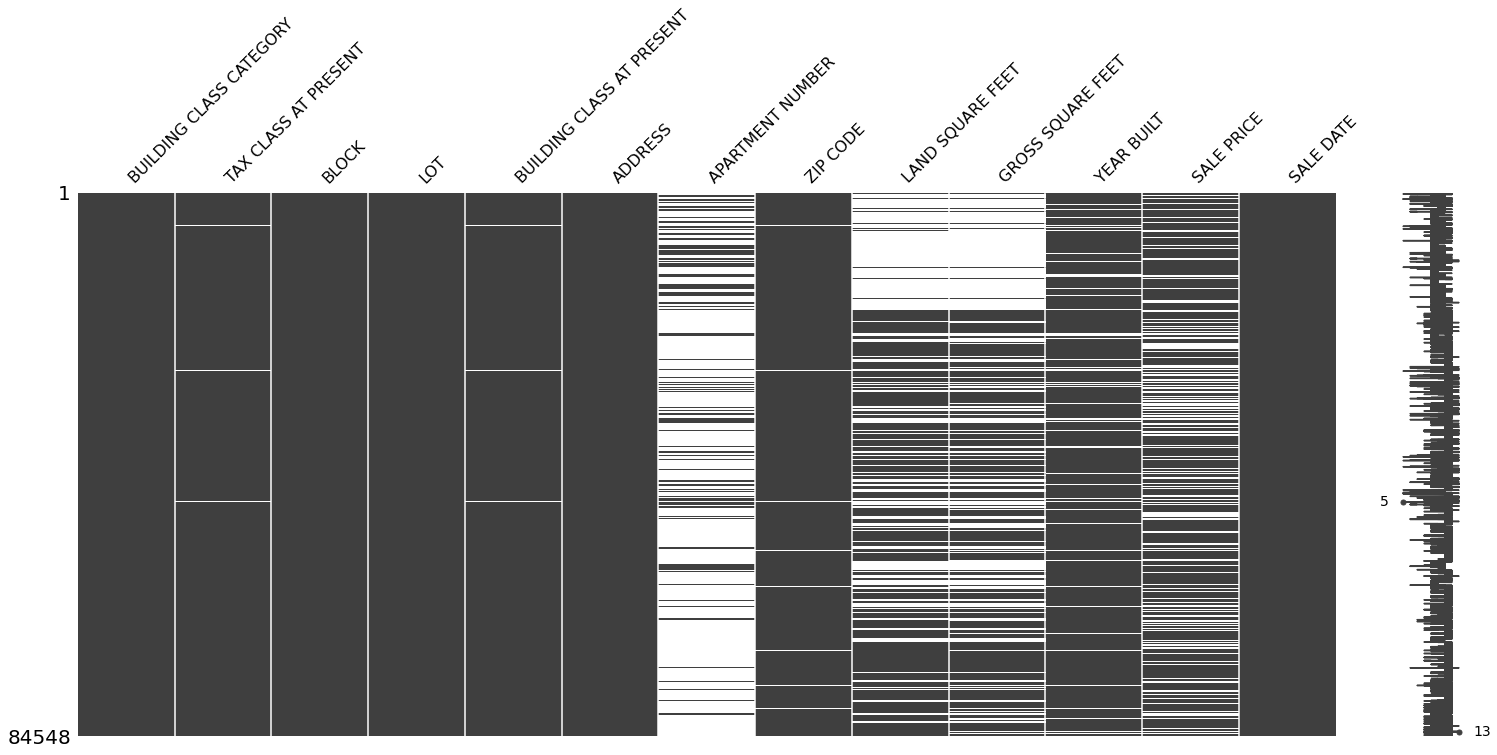

In [120]:
msno.matrix(mis_data)

1. We can see that land square feet and gross square feet the missing values are MAR the missing values are dependent on each
other same goes with Building class at present and tax class present.
2. Apartnumber is missing as all are not apartments so it makes sense all the places where sale price is zero 10 and nan are
missing 
3. Sale Price are missing for a lot of sales most of are gift deeds and inheritance
4. Year Built is MCAR


<AxesSubplot:>

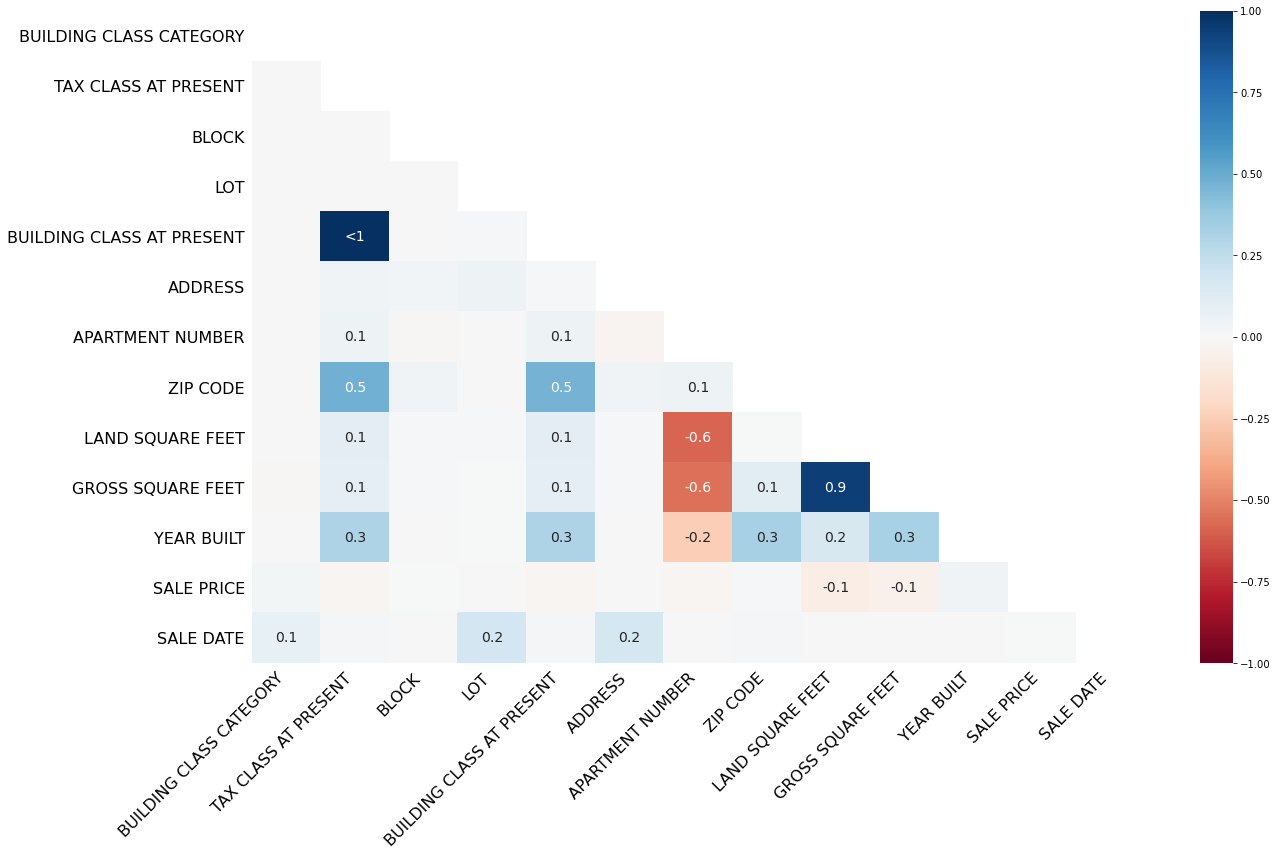

In [97]:
msno.heatmap(mis_data)

1. Land Square Feet and Gross Square Feet are derived from each other and show 0.9 correlation
2. Tax class present and building class present are also highly correlated

<AxesSubplot:>

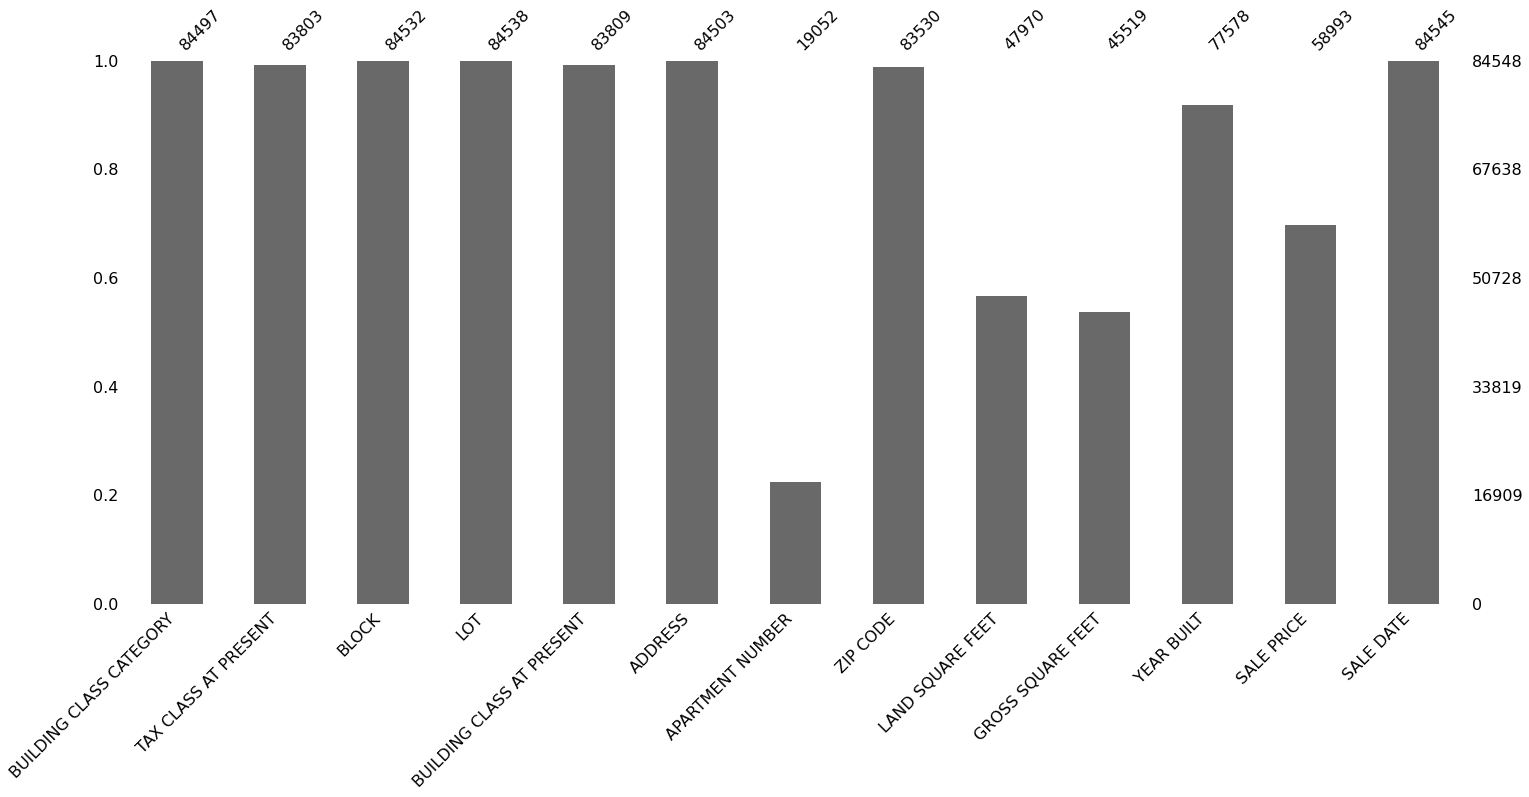

In [122]:
msno.bar(mis_data) 

1. Apartment number can be dropped as majority is missing not valuable for analysis
2. Gross square feet and land square feet are the second most missing values
3. Missing sale values can be accounted for gift and inheritance

In [124]:
ns.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                           1018
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        25555
SALE DATE                             3
dtype: int64

In [125]:
ns.shape

(84548, 20)

#### Imputing missing values

In [126]:
clean_df = ns.copy()


In [127]:
#clean_df.drop(clean_df[(clean_df['SALE PRICE'] == np.nan)&(clean_df['SALE PRICE'] == 0.0)&(clean_df['SALE PRICE'] == 10.0)].index, inplace = True) 
#clean_df = clean_df[clean_df['SALE PRICE'].notna()]

In [128]:
clean_df.shape

(84548, 20)

In [129]:
clean_df['SALE PRICE'].isnull().sum()

25555

In [130]:
mis_data=clean_df[missing_cols]

In [131]:
mis_data.isnull().sum()

BUILDING CLASS CATEGORY         51
TAX CLASS AT PRESENT           745
BLOCK                           16
LOT                             10
BUILDING CLASS AT PRESENT      739
ADDRESS                         45
APARTMENT NUMBER             65496
ZIP CODE                      1018
LAND SQUARE FEET             36578
GROSS SQUARE FEET            39029
YEAR BUILT                    6970
SALE PRICE                   25555
SALE DATE                        3
dtype: int64

#### Imputing ZIP CODE
1. Imputing zip code by creating dictionary taking the mode of the area zip code
2.  Replacing nan values with the mode

In [133]:
m=pd.DataFrame(clean_df.groupby(['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY'])['ZIP CODE'].unique())
m.reset_index()
#{'ALPHABET CITY':10009.0,'COLLEGE POINT':11356.0,'SOUTH JAMAICA':11433.0}

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,"[10009.0, nan]"
1,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,[nan]
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,"[nan, 10009.0]"
3,1,ALPHABET CITY,10 COOPS - ELEVATOR APARTMENTS,[10009.0]
4,1,ALPHABET CITY,11A CONDO-RENTALS,"[10009.0, nan, 10002.0]"
...,...,...,...,...
3346,5,WILLOWBROOK,44 CONDO PARKING,[10314.0]
3347,5,WOODROW,01 ONE FAMILY DWELLINGS,[10309.0]
3348,5,WOODROW,02 TWO FAMILY DWELLINGS,[10309.0]
3349,5,WOODROW,22 STORE BUILDINGS,[10309.0]


In [134]:
m[m['ZIP CODE'].map(len)>1]

ZIP CODE
BOROUGH NEIGHBORHOOD              BUILDING CLASS CATEGORY                                                                      
1       ALPHABET CITY             07 RENTALS - WALKUP APARTMENTS                                                 [10009.0, nan]
                                  09 COOPS - WALKUP APARTMENTS                                                   [nan, 10009.0]
                                  11A CONDO-RENTALS                                                     [10009.0, nan, 10002.0]
                                  13 CONDOS - ELEVATOR APARTMENTS                                            [10009.0, 10002.0]
        CHELSEA                   07 RENTALS - WALKUP APARTMENTS                                             [10001.0, 10011.0]
                                  08 RENTALS - ELEVATOR APARTMENTS                                           [10011.0, 10001.0]
                                  09 COOPS - WALKUP APARTMENTS                                               [10011.0, 10001.0]
                                  10 COOPS - ELEVATOR APARTMENTS                                    [10011.0, 10014.0, 10001.0]
                                  13 CONDOS - ELEVATOR APARTMENTS                     [10011.0, 10001.0, nan, 10014.0, 10010.0]
                                  14 RENTALS - 4-10 UNIT                                                     [10011.0, 10001.0]
                                  15 CONDOS - 2-10 UNIT RESIDENTIAL                                              [10011.0, nan]
                                  16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT                                     [nan, 10011.0]
                                  21 OFFICE BUILDINGS                                               [10011.0, 10001.0, 10013.0]
                                  22 STORE BUILDINGS                                                         [10011.0, 10001.0]
                                  23 LOFT BUILDINGS                                                          [10011.0, 10001.0]
                                  26 OTHER HOTELS                                                            [10001.0, 10011.0]
                                  29 COMMERCIAL GARAGES                                                      [10001.0, 10011.0]
                                  44 CONDO PARKING                                                               [10011.0, nan]
                                  46 CONDO STORE BUILDINGS                                                   [10011.0, 10001.0]
                                  47 CONDO NON-BUSINESS STORAGE                                                  [10011.0, nan]
        CHINATOWN                 07 RENTALS - WALKUP APARTMENTS                                             [10013.0, 10002.0]
                                  13 CONDOS - ELEVATOR APARTMENTS                                            [10013.0, 10002.0]
                                  43 CONDO OFFICE BUILDINGS                                         [10013.0, 10038.0, 10002.0]
                                  46 CONDO STORE BUILDINGS                                                   [10013.0, 10002.0]
        CIVIC CENTER              08 RENTALS - ELEVATOR APARTMENTS                                           [10007.0, 10013.0]
                                  10 COOPS - ELEVATOR APARTMENTS                                    [10038.0, 10007.0, 10013.0]
                                  13 CONDOS - ELEVATOR APARTMENTS                                       [10007.0, nan, 10013.0]
                                  14 RENTALS - 4-10 UNIT                                                     [10007.0, 10013.0]
                                  15 CONDOS - 2-10 UNIT RESIDENTIAL                                          [10007.0, 10013.0]
                                  17 CONDO COOPS                                                             [10007.0, 10013.0]
                       

In [140]:
n=clean_df.groupby(['BOROUGH','NEIGHBORHOOD'])['ZIP CODE'].apply(lambda x: x.mode()).reset_index()

In [141]:
n

,BOROUGH,NEIGHBORHOOD,level_2,ZIP CODE
0,1,ALPHABET CITY,0,10009.0
1,1,CHELSEA,0,10011.0
2,1,CHINATOWN,0,10013.0
3,1,CIVIC CENTER,0,10007.0
4,1,CLINTON,0,10019.0
5,1,EAST VILLAGE,0,10003.0
6,1,FASHION,0,10018.0
7,1,FINANCIAL,0,10005.0
8,1,FLATIRON,0,10010.0
9,1,GRAMERCY,0,10003.0


In [142]:
n_list=n['NEIGHBORHOOD'].tolist()

In [143]:
z_list=n['ZIP CODE'].tolist()

In [150]:
dict_n={}
for t in range(len(n_list)):
    dict_n[n_list[t]]=z_list[t]

In [151]:
dict_n

{'ALPHABET CITY': 10009.0,
 'CHELSEA': 10011.0,
 'CHINATOWN': 10013.0,
 'CIVIC CENTER': 10007.0,
 'CLINTON': 10019.0,
 'EAST VILLAGE': 10003.0,
 'FASHION': 10018.0,
 'FINANCIAL': 10005.0,
 'FLATIRON': 10010.0,
 'GRAMERCY': 10003.0,
 'GREENWICH VILLAGE-CENTRAL': 10003.0,
 'GREENWICH VILLAGE-WEST': 10014.0,
 'HARLEM-CENTRAL': 10027.0,
 'HARLEM-EAST': 10029.0,
 'HARLEM-UPPER': 10031.0,
 'HARLEM-WEST': 10031.0,
 'INWOOD': 10034.0,
 'JAVITS CENTER': 10001.0,
 'KIPS BAY': 10016.0,
 'LITTLE ITALY': 10012.0,
 'LOWER EAST SIDE': 10002.0,
 'MANHATTAN VALLEY': 10025.0,
 'MIDTOWN CBD': 10022.0,
 'MIDTOWN EAST': 10022.0,
 'MIDTOWN WEST': 10019.0,
 'MORNINGSIDE HEIGHTS': 10027.0,
 'MURRAY HILL': 10016.0,
 'ROOSEVELT ISLAND': 10044.0,
 'SOHO': 10013.0,
 'SOUTHBRIDGE': 10038.0,
 'TRIBECA': 10013.0,
 'UPPER EAST SIDE (59-79)': 10021.0,
 'UPPER EAST SIDE (79-96)': 10128.0,
 'UPPER EAST SIDE (96-110)': 10029.0,
 'UPPER WEST SIDE (59-79)': 10023.0,
 'UPPER WEST SIDE (79-96)': 10024.0,
 'UPPER WEST SIDE (9

In [148]:
l=clean_df[clean_df['ZIP CODE'].isna()].index.tolist()

In [160]:
for i in l:

    if clean_df.iloc[i]['NEIGHBORHOOD'] == 'PELHAM BAY':
        print(i)
    else:
        clean_df.loc[i,'ZIP CODE']=dict_n[clean_df.loc[i]['NEIGHBORHOOD']]

22329


In [161]:
clean_df['ZIP CODE'].isnull().sum()

1

#### Imputing year built using mode technique for each neighborhood

In [179]:
m=clean_df.groupby(['BOROUGH','NEIGHBORHOOD','BLOCK'])['YEAR BUILT'].apply(lambda x: x.mode()).reset_index()

In [180]:
p=clean_df[clean_df['YEAR BUILT'].isna()].index.tolist()

In [194]:
for i in p:
        n=m[(m['NEIGHBORHOOD']==clean_df.loc[i]['NEIGHBORHOOD']) & (m['BLOCK']==clean_df.loc[i]['BLOCK'])].index.tolist()
       
        if len(n) != 0:
            a=n[0]
            clean_df.loc[i,'YEAR BUILT']=m.loc[a]['YEAR BUILT']

In [196]:
clean_df['YEAR BUILT'].isnull().sum()

0

#### Imputing the Sales Prices
1. Considering business neighborhood block and class replacing with the mean sale

In [197]:
m=clean_df.groupby(['BOROUGH','NEIGHBORHOOD','BLOCK','BUILDING CLASS CATEGORY'])['SALE PRICE'].apply(lambda x: x.mean()).reset_index()

In [198]:
m

,BOROUGH,NEIGHBORHOOD,BLOCK,BUILDING CLASS CATEGORY,SALE PRICE
0,1,ALPHABET CITY,372.0,15 CONDOS - 2-10 UNIT RESIDENTIAL,770000.000000
1,1,ALPHABET CITY,373.0,09 COOPS - WALKUP APARTMENTS,480000.000000
2,1,ALPHABET CITY,373.0,13 CONDOS - ELEVATOR APARTMENTS,767760.000000
3,1,ALPHABET CITY,374.0,09 COOPS - WALKUP APARTMENTS,NaN
4,1,ALPHABET CITY,375.0,09 COOPS - WALKUP APARTMENTS,350000.000000
...,...,...,...,...,...
33255,5,WOODROW,7349.0,02 TWO FAMILY DWELLINGS,500000.000000
33256,5,WOODROW,7351.0,01 ONE FAMILY DWELLINGS,517500.000000
33257,5,WOODROW,7351.0,02 TWO FAMILY DWELLINGS,460000.000000
33258,5,WOODROW,7355.0,01 ONE FAMILY DWELLINGS,634364.333333


In [201]:
p=clean_df[clean_df['SALE PRICE'].isna()].index.tolist()

In [200]:
m['SALE PRICE'].isnull().sum()

8454

In [203]:
for i in p:
        n=m[(m['NEIGHBORHOOD']==clean_df.loc[i]['NEIGHBORHOOD']) & (m['BLOCK']==clean_df.loc[i]['BLOCK'])& (m['BUILDING CLASS CATEGORY']==clean_df.loc[i]['BUILDING CLASS CATEGORY'])].index.tolist()
       
        if len(n) != 0:
            a=n[0]
            clean_df.loc[i,'SALE PRICE']=m.loc[a]['SALE PRICE']

In [204]:
clean_df['SALE PRICE'].isnull().sum()

11304

2. The rest that were still missing were cleaned by only taking neighborhood and building class category

In [208]:
m=clean_df.groupby(['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY'])['SALE PRICE'].apply(lambda x: x.mean()).reset_index()

In [209]:
p=clean_df[clean_df['SALE PRICE'].isna()].index.tolist()

In [210]:
for i in p:
        n=m[(m['NEIGHBORHOOD']==clean_df.loc[i]['NEIGHBORHOOD']) &  (m['BUILDING CLASS CATEGORY']==clean_df.loc[i]['BUILDING CLASS CATEGORY'])].index.tolist()      
        if len(n) != 0:
            a=n[0]
            clean_df.loc[i,'SALE PRICE']=m.loc[a]['SALE PRICE']

In [211]:
clean_df['SALE PRICE'].isnull().sum()

1115

3. Further missing values were imputed by neighborhood

In [213]:
m=clean_df.groupby(['BOROUGH','NEIGHBORHOOD'])['SALE PRICE'].apply(lambda x: x.mean()).reset_index()

In [214]:
p=clean_df[clean_df['SALE PRICE'].isna()].index.tolist()

In [215]:
for i in p:
        n=m[(m['NEIGHBORHOOD']==clean_df.loc[i]['NEIGHBORHOOD'])].index.tolist()      
        if len(n) != 0:
            a=n[0]
            clean_df.loc[i,'SALE PRICE']=m.loc[a]['SALE PRICE']

In [216]:
clean_df['SALE PRICE'].isnull().sum()

2

#### Imputing missing values of text class at present 

In [217]:
checkingTax = pd.DataFrame(clean_df.groupby(by=['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY'])['TAX CLASS AT PRESENT'].unique())
checkingTax.reset_index(inplace = True)

In [218]:
checkingTax[checkingTax['TAX CLASS AT PRESENT'].map(len)>1]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,"[2A, 2, nan]"
1,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,"[nan, 2, 2B]"
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,"[2, 2C]"
4,1,ALPHABET CITY,11A CONDO-RENTALS,"[2, nan]"
20,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,"[2B, 2A, 2]"
21,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,"[2B, 2]"
22,1,CHELSEA,09 COOPS - WALKUP APARTMENTS,"[2C, 2]"
23,1,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,"[2, 2C]"
25,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"[2, nan]"
27,1,CHELSEA,15 CONDOS - 2-10 UNIT RESIDENTIAL,"[2C, nan]"


In [219]:
clean_df[(clean_df['BUILDING CLASS CATEGORY'].str.find('46 CONDO STORE BUILDINGS')>-1)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
199,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,384.0,1201.0,RK,310 EAST HOUSTON STREET,COM,10002.0,0,0,1,NaN,NaN,2005.0,4,RK,1.080000e+07,3/10/2017 0:00
200,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,397.0,1302.0,RK,250 EAST HOUSTON STREET,UNIT2,10002.0,0,0,1,NaN,NaN,1989.0,4,RK,5.262500e+07,10/19/2016 0:00
201,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,397.0,1303.0,RK,250 EAST HOUSTON STREET,UNIT3,10002.0,0,0,1,NaN,NaN,1989.0,4,RK,5.262500e+07,10/19/2016 0:00
979,1,CHELSEA,46 CONDO STORE BUILDINGS,4,695.0,1201.0,RK,521 WEST 23RD STREET,GNDFL,10011.0,0,0,1,NaN,NaN,2005.0,4,RK,3.425000e+06,4/28/2017 0:00
980,1,CHELSEA,46 CONDO STORE BUILDINGS,4,695.0,1202.0,RK,521 WEST 23RD STREET,2FL,10011.0,0,0,1,NaN,NaN,2005.0,4,RK,5.100000e+06,12/2/2016 0:00
981,1,CHELSEA,46 CONDO STORE BUILDINGS,4,695.0,1203.0,RK,521 WEST 23RD STREET,3FL-F,10011.0,0,0,1,NaN,NaN,2005.0,4,RK,1.750000e+06,1/18/2017 0:00
982,1,CHELSEA,46 CONDO STORE BUILDINGS,4,721.0,1052.0,RK,405 WEST 23RD STREET,7B-D,10011.0,0,0,1,NaN,NaN,1932.0,4,RK,5.631250e+06,5/3/2017 0:00
983,1,CHELSEA,46 CONDO STORE BUILDINGS,4,721.0,1067.0,RK,215 9 AVENUE,7A,10011.0,0,0,1,NaN,NaN,1932.0,4,RK,5.631250e+06,5/3/2017 0:00
984,1,CHELSEA,46 CONDO STORE BUILDINGS,4,745.0,1301.0,RK,225 8 AVENUE,COM,10011.0,0,0,1,NaN,NaN,1900.0,4,RK,5.631250e+06,5/2/2017 0:00
985,1,CHELSEA,46 CONDO STORE BUILDINGS,4,774.0,1001.0,RK,252 7 AVENUE,COMM1,10001.0,0,0,1,NaN,NaN,1963.0,4,RK,5.631250e+06,8/22/2017 0:00


In [220]:
taxClassFault = checkingTax[checkingTax['TAX CLASS AT PRESENT'].map(len)>1]

In [221]:
taxClassFault.reset_index(inplace=True)

In [222]:
for i in range(0,len(taxClassFault)):
    clean_df.loc[
        (clean_df['BOROUGH']==taxClassFault.loc[i]['BOROUGH'])&
        (clean_df['NEIGHBORHOOD']==taxClassFault.loc[i]['NEIGHBORHOOD'])&
        (clean_df['BUILDING CLASS CATEGORY']==taxClassFault.loc[i]['BUILDING CLASS CATEGORY']),
    'TAX CLASS AT PRESENT'] = [s for s in taxClassFault.loc[i]['TAX CLASS AT PRESENT'] if isinstance(s, float)==False][0]

In [225]:
clean_df['TAX CLASS AT PRESENT'].isnull().sum()

6

In [226]:
clean_df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  6
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                              1
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            2
SALE DATE                             3
dtype: int64

1. The column building class at present can be dropped because it is highly correlated with TAX CLASS AT PRESENT imputing
it would not really add to the analysis.
2. Apartment number can also be dropped more than 80 percent values are missing.
3. Out of land square feet and gross square feet one can be imputed but wasnt because of time constarints other can be dropped because representing the same value.
4. For others which we could not keep impute the rows are like 2 to 6 can be dropped

In [227]:
clean_df.drop(["BUILDING CLASS AT PRESENT",'LAND SQUARE FEET'],axis=1,inplace=True)

In [229]:
clean_df.drop(["APARTMENT NUMBER"],axis=1,inplace=True)

In [230]:
clean_df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  6
BLOCK                                16
LOT                                  10
ADDRESS                              45
ZIP CODE                              1
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
GROSS SQUARE FEET                 39029
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            2
SALE DATE                             3
dtype: int64